In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import scipy.stats as st

In [10]:
data = pd.read_csv("../output/base/graph_data.csv").set_index(["model", "condition", "item_idx", "region"]).sort_index()
data.head()

index  \
model    condition         item_idx           region                  
baseline ambiguous_reduced ('clifton2003', 0) Ambiguous verb      0   
                                              Disambiguator       0   
                                              Noun                0   
                                              RC contents         0   
                                              Start               0   

                                                              agg_surprisal  \
model    condition         item_idx           region                          
baseline ambiguous_reduced ('clifton2003', 0) Ambiguous verb       9.929473   
                                              Disambiguator       27.471853   
                                              Noun                16.687321   
                                              RC contents         16.494986   
                                              Start                0.000000   

                                                              time  
model    condition         item_idx           region                
baseline ambiguous_reduced ('clifton2003', 0) Ambiguous verb     3  
                                              Disambiguator      5  
                                              Noun               1  
                                              RC contents        4  
                                              Start              0

In [11]:
baseline = data.loc["baseline", "ambiguous_reduced", :, "Disambiguator"]
baseline.head()

index  \
model    condition         item_idx            region                 
baseline ambiguous_reduced ('clifton2003', 0)  Disambiguator      0   
                           ('clifton2003', 1)  Disambiguator      4   
                           ('clifton2003', 10) Disambiguator     40   
                           ('clifton2003', 11) Disambiguator     44   
                           ('clifton2003', 2)  Disambiguator      8   

                                                              agg_surprisal  \
model    condition         item_idx            region                         
baseline ambiguous_reduced ('clifton2003', 0)  Disambiguator      27.471853   
                           ('clifton2003', 1)  Disambiguator      25.432901   
                           ('clifton2003', 10) Disambiguator      27.374937   
                           ('clifton2003', 11) Disambiguator      30.891525   
                           ('clifton2003', 2)  Disambiguator      27.707792   

                                                              time  
model    condition         item_idx            region               
baseline ambiguous_reduced ('clifton2003', 0)  Disambiguator     5  
                           ('clifton2003', 1)  Disambiguator     5  
                           ('clifton2003', 10) Disambiguator     5  
                           ('clifton2003', 11) Disambiguator     5  
                           ('clifton2003', 2)  Disambiguator     5

In [42]:
surg_models = ['surgery_0.100000', 'surgery_1.000000', 'surgery_10.000000']
surg_model = surg_models[2]
surg_data = data.loc[surg_model, "ambiguous_reduced", :, "Disambiguator"]
surg_data.head()

index  \
model             condition         item_idx            region                 
surgery_10.000000 ambiguous_reduced ('clifton2003', 0)  Disambiguator      0   
                                    ('clifton2003', 1)  Disambiguator      4   
                                    ('clifton2003', 10) Disambiguator     40   
                                    ('clifton2003', 11) Disambiguator     44   
                                    ('clifton2003', 2)  Disambiguator      8   

                                                                       agg_surprisal  \
model             condition         item_idx            region                         
surgery_10.000000 ambiguous_reduced ('clifton2003', 0)  Disambiguator      25.566574   
                                    ('clifton2003', 1)  Disambiguator      24.628550   
                                    ('clifton2003', 10) Disambiguator      25.576254   
                                    ('clifton2003', 11) Disambiguator      31.829256   
                                    ('clifton2003', 2)  Disambiguator      21.884193   

                                                                       time  
model             condition         item_idx            region               
surgery_10.000000 ambiguous_reduced ('clifton2003', 0)  Disambiguator     5  
                                    ('clifton2003', 1)  Disambiguator     5  
                                    ('clifton2003', 10) Disambiguator     5  
                                    ('clifton2003', 11) Disambiguator     5  
                                    ('clifton2003', 2)  Disambiguator     5

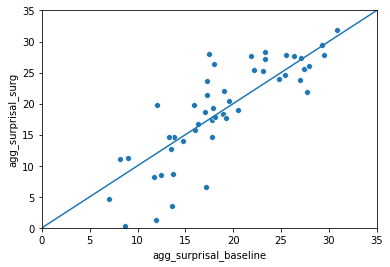

In [43]:
scatter_data = baseline.reset_index(level=["model", "condition", "region"], drop=True).join(
    surg_data.reset_index(level=["model", "condition", "region"], drop=True), lsuffix="_baseline", rsuffix="_surg")

ax = sns.scatterplot(data=scatter_data, x="agg_surprisal_baseline", y="agg_surprisal_surg")
ax.set_xlim((0, 35))
ax.set_ylim((0, 35))
# plot x=y
ax.plot([0,1],[0,1], transform=ax.transAxes)

/home/jon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


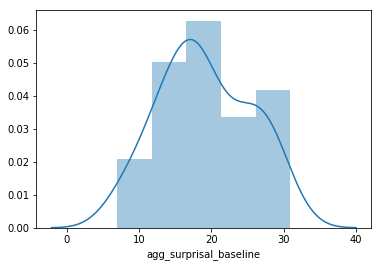

In [44]:
sns.distplot(scatter_data.agg_surprisal_baseline)

/home/jon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


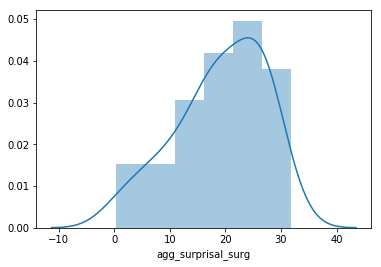

In [45]:
sns.distplot(scatter_data.agg_surprisal_surg)

In [46]:
st.ttest_rel(scatter_data.agg_surprisal_baseline, scatter_data.agg_surprisal_surg)

Ttest_relResult(statistic=0.03708591390588556, pvalue=0.9705671823856444)